# Примена SVD


Садржај:
1. [Проблеми високе димензионалности података](#Проблеми-високе-димензионалности-података)
1. [Апроксимација матрица](#Апроксимација-матрица)
1. [Анализа главним осама (PCA)](#Анализа-главним-осама-(PCA))

In [1]:
import numpy as np
import numpy.random as rndm
import scipy.linalg as spl
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Проблеми високе димензионалности података

Наша чула подешена су да видимо свет око нас у три димензије. Збг тога се суочавамо са проблемом када покушамо да замислимо простор са више димензија. Чак и обична коцка у 4D (хиперкоцка) је веома тешка да се визуелно усвоји, а камоли $200$-димензионални елипсоид угњежден у простор димензије пар хиљада. 

<div>
   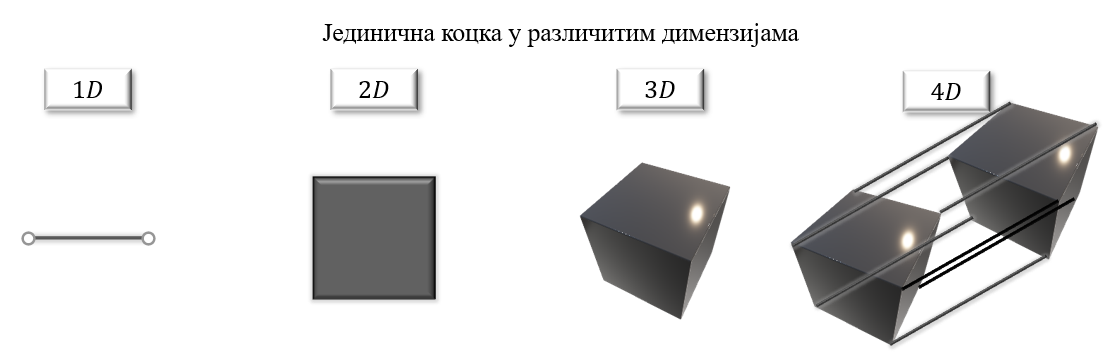  
</div>

Осим тих проблема везаних за наш интуитивни доживљај више димензија, испоставља се да са повећањем димензионалности објекти губе својства која их прате у ниже димензионалним просторима. Применом операција над вишедимензионалним објектима испоставља се да се ствари прилично неинтуитивно одвијају у просторима великих димензија. Приказаћемо то кроз наредне примере.

**Пример 1.** Генерисаћемо по $1000$ случајних тачака унутар јединичне коцке простора различитих димензија. То ће значити да се координате тачака бирају униформно из сегмента $[0,1]$ и да избор координата сваке од тачака није никако повезан - независан избор случајних бројева. Бројаћемо тачке које се налазе близу граница јединичне коцке, тј пратићемо појаву "екстремних" тачака дуж било које координатне осе. 

У једнодимензионалном простору јединичну коцку представља сегмент $[0,1].$ Генерисаћемо тачке унутар ове коцке коришћењем модула Random. То ће значити генерисање само једне координате за $1000$ тачака.

In [2]:
tacke1=rndm.rand(1000)
k1=np.sum((tacke1<0.01) | (tacke1>0.99))
k1

27

Експеримент можемо да поновимо више пута како бисмо добили процену броја појављивања оваквих тачака путем средње вредности.

In [3]:
for i in range(499):
    tacke1=rndm.rand(1000)
    k1+=np.sum((tacke1<0.01) | (tacke1>0.99))
prosek1=k1/500    
print("prosek ekstremnih tacaka=",prosek1)    
print("u procentima =",np.round(prosek1/10,2))

prosek ekstremnih tacaka= 19.878
u procentima = 1.99


Примећујемо да је проценат екстремних тачака око $2\%.$

У дводимензионалном случају јединичну коцку представља јединични квадрат $[0,1]\times[0,1].$ Генерисаћемо $1000$ случајних тачака овог скупа, тј. дводимезионални низ типа $2\times1000.$  

In [4]:
tacke2=rndm.rand(2,1000)
k2=np.sum(np.any((tacke2<0.01) | (tacke2>0.99), axis=0))
k2

37

Понављањем експеримента добијамо просечан број појављивања оваквих ивичних тачака.

In [5]:
for i in range(499):
    tacke2=rndm.rand(2,1000)
    k2+=np.sum(np.any((tacke2<0.01) | (tacke2>0.99), axis=0))
prosek2=k2/500    
print("prosek ekstremnih tacaka=",prosek2) 
print("u procentima =",np.round(prosek2/10,2))

prosek ekstremnih tacaka= 39.438
u procentima = 3.94


Са повећањем димензије за $1$ број екстрема је порасао на око $4\%.$

На сличан начин регистроваћемо појављивање екстрема у јединичној коцки за просторе димензије $n\in\{3,10,100,1000,10000\}.$

In [6]:
for n in [3,10,100,1000,10000]:
    k=0
    for i in range(500):
        tacke=rndm.rand(n,1000)
        k+=np.sum(np.any((tacke<0.01) | (tacke>0.99), axis=0))
    prosek=k/500
    print("Za n=",n, "prosek ekstremnih tacaka=",prosek)
    print("u procentima=",np.round(prosek/10,2))

Za n= 3 prosek ekstremnih tacaka= 58.87
u procentima= 5.89
Za n= 10 prosek ekstremnih tacaka= 182.61
u procentima= 18.26
Za n= 100 prosek ekstremnih tacaka= 866.772
u procentima= 86.68
Za n= 1000 prosek ekstremnih tacaka= 1000.0
u procentima= 100.0
Za n= 10000 prosek ekstremnih tacaka= 1000.0
u procentima= 100.0


Пример показује да са великим бројем димензија готово све тачке јединичне коцке спадају у екстреме дуж неке координатне осе у случају равномерне расподеле вредности координата. Због тога је одбацивање података са екстремним вредностима у више димензија губитак суштинских информација.

**Пример 2.** Бираћемо парове тачака унутар јединичне коцке и мерићемо растојање међу њима. Пратићемо расподелу ових растојања за различите димензије простора. 

In [7]:
for n in [1,2,3,10,100,1000,10000,1000000]:
    d=0
    for i in range(500):
        tacke=rndm.rand(2,n)
        d+=np.linalg.norm(tacke[0]-tacke[1])
    print("Za n=",n, "prosecno rastojanje=",d/500)

Za n= 1 prosecno rastojanje= 0.32844981832356024
Za n= 2 prosecno rastojanje= 0.527050548485705
Za n= 3 prosecno rastojanje= 0.6654591086261765
Za n= 10 prosecno rastojanje= 1.2656940498622327
Za n= 100 prosecno rastojanje= 4.071868129616277
Za n= 1000 prosecno rastojanje= 12.89408590687286
Za n= 10000 prosecno rastojanje= 40.82355495336384
Za n= 1000000 prosecno rastojanje= 408.23487702996795


Изведени експеримент сугерише да су скупови података великих димезија ретко поседнути у односу на стандардне начине мерења растојања. У поступцима регресије или класификације, већина тренинг података ће највероватније бити тачке далеко једне од других. То наравано важи онда и за податке валидационог скупа, како међусобно тако и у односу на тренинг податке. Због тога ће функције модела вероватно давати мање поуздане резултате у односу на сличне функције над подацима мање димензионалности. Разлог лежи у чињеници да веће димензије подразумевају већу употребу екстраполације самим тим и мање поуздане резултате. Укратко, што већу димензионалност тренинг скуп поседује то је већи ризик од лоше предикције на валидационим подацима (overfitting).

У теорији, један од начина да се изборимо са проблемом високодимензионалних података јесте да скуп тренинг података буде довољно велики чиме бисмо обезбедили довољну густину међу подацима. То је решење које је могуће углавном реализовати само у теорији с обзиром да број потребних података тог типа расте експоненцијално са димензијом. Рецимо, за димензију $100$ број потребних података би превазишао број атома у видљивом универзуму. 

У пракси, решење проблема димензионалности података тражимо кроз пројекције података на потпростор мање димензије који је близу целог скупа података. Са тим у вези су наредне теме.

## Апроксимација матрица

Питање које овде разматрамо гласи:

>Колико можемо да упростимо формат полазне матрице тако да најрелевантније информације о њој буду сачуване? 

Због теореме о факторизацији пуног ранга и њених последица, занима нас апроксимација матрицама нижег ранга. Ова врста апроксимација има велику улогу у компресији података и поступцима повећања ефикасности алгоритама.

Број позитивних сингуларних вредности матрице користи се за одређивање нумеричког ранга матрице. За сингуларне вредности добијене неком нумеричком процедуром узимамо позитивне бројеве који прелазе неки унапред изабран праг позитивности. 
$$\sigma_i\geq{\rm prag}>0.$$
Све остале сингуларне вредности из опсега $(0,{\rm prag})$ могу се сматрати нетачно израчунатим нулама. Узимамо их за шумове који су последица грешака заокруживања.

Нека је 
$A=U_r\Sigma_{r\times r}V_r^T$ редукована $SVD$ матрице $A.$ Овај матрични производ посматрамо растављен на збир спољашњих производа, тј. на збир матрица ранга $1$ поређаних по 'тежини' или 'према значају'. Рангирање се врши на основу величине сингуларних вредности
$$A=\sigma_1u_1v_1^T+\sigma_2u_2v_2^T+\dots+\sigma_ru_rv_r^T,\quad \sigma_1\geq\sigma_2\geq\dots\geq\sigma_r.$$
Редуковањем ове суме на мањи број сабирака добијамо матрице са посебним својством. 

**Теорема 1. Eckart-Young-Mirsky Теорема**

Нека је $A=\displaystyle\sum_{i=1}^r\sigma_iu_iv_i^T$ редукована $SVD$ матрице $A$ где за сингуларне вредности важи распоред $\sigma_1\geq\sigma_2\geq\dots\geq\sigma_r>0.$ За прозвољно $k\in\mathbb{N},$  $1\leq k\leq r$ дефинишимо матрицу ранга $k$ на следећи начин $$A_k=\displaystyle\sum_{i=1}^k\sigma_iu_iv_i^T.$$  Тада важи
$$
\|A-A_k\|_2=\min_{{\rm rang}\leq k}\|A-B\|_2,\qquad\mbox{ и }\qquad
\|A-A_k\|_F=\min_{{\rm rang}(B)\leq k}\|A-B\|_F.
$$

**Доказ :**

Подсетимо се да за $L_2$ и Фробенијусову норму важи
$$\|X\|_2=\max_i\{\sigma_i\},\qquad \|X\|_F=\sqrt{\sigma_1^2+\dots+\sigma_r^2},$$
где су $\sigma_i$ сингуларне вредности матрице $X.$
На основу последице 3 из радне свеске 21SVD тада је
\begin{align}
A-A_k&=\displaystyle\sum_{i=1}^r\sigma_iu_iv_i^T-\sum_{i=1}^k\sigma_iu_iv_i^T
=\sum_{i=k+1}^r\sigma_iu_iv_i^T\\
\Longrightarrow&\quad \|A-A_k\|_2=\sigma_{k+1}=\max_{\|v\|=1}\|(A-A_k)v\|,\qquad \|A-A_k\|_F
=\sqrt{\sigma_{k+1}^2+\dots+\sigma_r^2}\,.
\end{align}

Претпоставимо да постоји матрица $B\in\mathcal{M}_{m\times n}$ ранга $s,\ 1\leq s\leq k,$ таква да је $\|A-B\|_2=\displaystyle\max_{\|v\|=1}\|(A-B)v\|<\sigma_{k+1}.$ Како је ${\rm rang}(B)=s$ то је на основу основног става линеарне алгебре ${\rm def}(B)={\rm dim}\,\mathcal{N}(B)=n-s.$ За сваки вектор $x\in\mathcal{N}(B)$ важи да је
$(A-B)x=Ax-Bx=Ax.$ Због тога је
$$\max_{\|x\|=1,\ x\in\mathcal{N}(B)}\|(A-B)x\|=\max_{\|x\|=1,\ x\in\mathcal{N}(B)}\|Ax\|<\sigma_{k+1}.$$
Са друге стране, на основу последице 2 из радне свеске 21SVD, за сваки нормирани вектор $y\in\mathcal{L}(v_1,\dots,v_k,v_{k+1})$ важи да је 
$\|Ay\|\geq\sigma_{k+1}.$ С обзиром да су $\mathcal{N}(B)$ и $\mathcal{L}(v_1,\dots,v_k,v_{k+1})$ потпростори у $\mathbb{R}^n$ димензија редом $n-s\geq n-k$ и $k+1$ то постоји нормиран вектор у пресеку ова два потпростора, $x\in\mathcal{N}(B)\cap\mathcal{L}(v_1,\dots,v_k,v_{k+1}).$ Међутим, за њега важи $\|Ax\|<\sigma_{k+1}$ и $\|Ax\|\geq\sigma_{k+1},$ што је контрадикција. Закључујемо да матрица $A-A_k$ заиста минимизира $L_2$ норму матрица.

Покажимо сада аналогну неједнакост за Фробенијусову норму матрица, тј. показаћемо да важи
$$\|A-B\|_F^2={\rm tr}\left((A-B)^T(A-B)\right)\geq\sigma_{k+1}^2+\dots+\sigma_r^2.$$
Нека су колоне матрице $Q=\left[\begin{array}{c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
q_1&q_2&\dots&q_s\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]\in\mathcal{M}_{m\times s}$ ортонормирана база простора $\mathcal{R}(B),$ тј. важи $Q^TQ=I_s.$ Тада се $B$ може написати у облику $B=QY$ за неку матрицу $Y\in\mathcal{M}_{s\times n}.$ Користећи особине трага матрице
$${\rm tr}(X+Y)={\rm tr}(X)+{\rm tr}(Y)\qquad\mbox{и}\qquad{\rm tr}(XY)={\rm tr}(YX),$$ налазимо

\begin{align}
{\rm tr}\left((A-B)^T(A-B)\right)&={\rm tr}\left((A-QY)^T(A-QY)\right)\\
&={\rm tr}\left(A^TA+Y^TQ^TQY-A^TQY-Y^TQ^TA\right)\\
&={\rm tr}\left(A^TA+Y^TY-(Q^TA)^TY-Y^TQ^TA+A^TQQ^TA-A^TQQ^TA\right)\\
&={\rm tr}\left(A^TA+(Y-Q^TA)^T(Y-Q^TA)-A^TQQ^TA\right)\\
&={\rm tr}\left(A^TA\right)+\underbrace{{\rm tr}\left((Y-Q^TA)^T(Y-Q^TA)\right)}_{\geq0}-{\rm tr}\left(A^TQQ^TA\right)\\
&\geq{\rm tr}\left(A^TA\right)-{\rm tr}\left((A^TQ)^TA^TQ\right)={\rm tr}\left(A^TA\right)-\displaystyle\sum_{i=1}^s\|A^Tq_i\|^2\\
&\geq{\rm tr}\left(A^TA\right)-\displaystyle\max_{q_i}\sum_{i=1}^s\|A^Tq_i\|^2\geq\displaystyle\sum_{i=1}^r\sigma_i^2-\sum_{i=1}^s\sigma_i^2=\sum_{i=s+1}^r\sigma_i^2\\
&\stackrel{s\leq k}{\geq}
\displaystyle\sum_{i=k+1}^r\sigma_i^2.\ \Box
\end{align}

Претходном теоремом описано је веома важно својство матрица $A_k=\displaystyle\sum_{i=1}^k\sigma_iu_iv_i^T:$ 

> На скупу свих матрица ранга $k$ за $A_k$ важи да матрица разлике $A-A_k$ минимизира максимално истезање јединичне сфере као и да минимизира њено укупно средње квадратно истезање. Због тога матрицу $A_k$ називамо најбоља апроксимација матрице $A$ ранга $k.$

Геометријски посматрано, оваква апроксимација може да се тумачи на следећи начин: 

> Матрица $A$ слика јединичну сферу у елипсоид. Матрица ранга $1$ слика јединичну сферу у дуж. Најбоља једнодимензинална апроксимација елипсоида је дуж која спаја две најудаљеније тачке на елипси. Та дуж лежи на главној оси највећег истезања. 
Слично, матрица ранга $2$ слика јединичну сферу у елипсу. Најбоља дводимензионална апроксимација елипсоида, биће елипса у равни главних оса са највећим истезањем, итд...

Уколико матрицу $A\in\mathcal{M}_{m\times n}$ посматрамо у својству функције, тј. пресликавања $A:\mathbb{R}^n\mapsto\mathbb{R}^m,$ тада је најбоља апроксимација ранга $k$ пресликавање $A_k:\mathbb{R}^n\mapsto\mathbb{R}^m.$ Растојање између два преслиавања меримо помоћу $L_2$ индуковане норме, коју тада још зовемо и норма оператора. Када размишљамо о апроксимацији садржаја матрице $A,$ по колонама или врстама, тада растојање од друге матрице меримо помоћу Фробенијусове норме. И у једном и у другом случају решење најбоље апроксимације ранга $k$ даје  $A_k=\displaystyle\sum_{i=1}^k\sigma_iu_iv_i^T.$

**Пример 3.** Веома чест проблем у раду са сликама на рачунару представља њихова компресија. У појединим ситуацијама радимо са  gray-scale сликама. Оне се представљају матрицом. Разматрамо проблем представљања gray-scale слике матрицом нижег ранга од оригиналног, а да се том приликом не изгуби пуно на квалитету слике. 

Како би експериментални пример радио на свим рачунарима користићемо слику доступну из библиотеке scipy.misc.

In [8]:
from scipy import misc
rakun=misc.face()
type(rakun)

numpy.ndarray

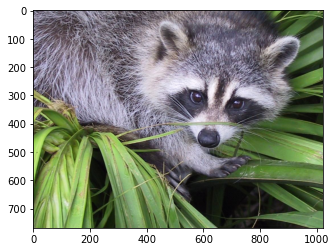

In [9]:
plt.imshow(rakun);

In [10]:
rakun.ndim, rakun.shape

(3, (768, 1024, 3))

Скалирамо компоненте тензора на $[0,1].$

In [11]:
np.min(rakun), np.max(rakun)

(0, 255)

In [12]:
sk_vredn=rakun/255
sk_vredn.max(), sk_vredn.min()

(1.0, 0.0)

In [13]:
rakun_gray = sk_vredn @ [0.2126, 0.7152, 0.0722]
rakun_gray.shape

(768, 1024)

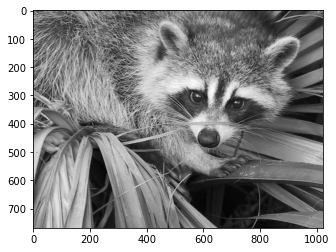

In [14]:
plt.imshow(rakun_gray, cmap="gray");

In [15]:
U, Sigma, Vt=spl.svd(rakun_gray)
U.shape, Sigma.shape, Vt.shape

((768, 768), (768,), (1024, 1024))

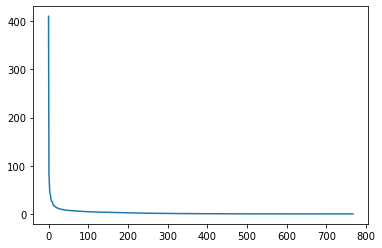

In [16]:
plt.plot(Sigma);

Примећујемо да сингуларне вредности редног броја између $100$ и $200$ (и надаље) постају занемарљиво мале у односу на првих неколико. Због тога матрицу ранга $768$ можемо да заменимо матрицом бар $3$ пута мањег ранга.

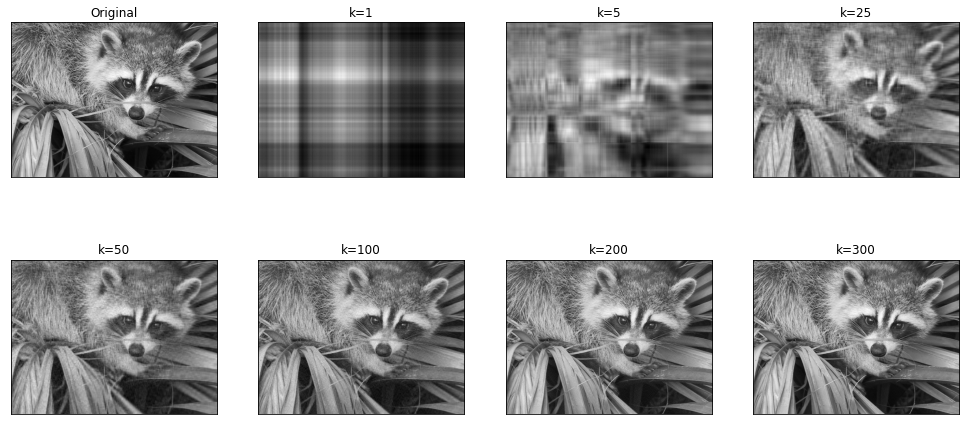

In [17]:
slika, ax = plt.subplots(2, 4,figsize=(17,8)) 

plt.subplot(2, 4, 1)
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.imshow(rakun_gray, cmap="gray")

i=2
for k in [1,5,25,50,100,200,300]:   #rang matrice Ak
    plt.subplot(2, 4, i)
    i+=1
    plt.title("k="+str(k))
    plt.xticks([])
    plt.yticks([])
    rakun_apr=(U[:,:k]*Sigma[:k])@Vt[:k]
    plt.imshow(rakun_apr, cmap="gray");

## Анализа главних компоненти (PCA)


PCA представља један од поступака редукције димензионалности податка. Користи се као корак у предпроцесирању података, тј. припрема за неки од алгоритама машинског учења. Циљ је свести број карактеристика података (димензија) на кључне карактеристике. 

Претоставимо да имамо велики обим високодимензионалних података. Рецимо да се ради о подацима о $10000$ људи и њиховим оценама $250$ филмова. Подаци су смештени у матрицу $A\in\mathcal{M}_{250\times10000}.$ Свака колона је вектор укуса једне од особа. Свака врста је вектор квалитета једног од филмова. Природно је питање да ли је потребно заиста $250$ димензија да би се описао укус једне особе, тј. да ли ови вектори леже у неком потпростору мање димензије? Могу ли се учити комбинације филмова који праве преломну разлику између класа различитих укуса?

Слично претходном проблему, приликом процене цене некретнина користи се база података о сваком стану или кући са подацима као што су реон, година изградње, квадратура, број соба, итд. Неке од карактеристика су међусобно повезане па не морају појединачно да се користе у брзој процени цене некретнине. Како одлучити шта су кључне карактеристике?

Сваки од наведених примера преведен у језик линеарне алгебре може да се формулише на следећи начин:
> За дати скуп од $n$ података димензије $m$ и за природан број $k<m,n$ како одредити  $k-$димензионални потпростор који најбоље описује дати скуп података? Под најбољим описом подразумевамо да је тај потпростор на најмањем растојању од скупа податка.

Да бисмо решили овај проблем потребно је да дефинишемо растојање скупа тачака од потпростора. То ће онда представљати и функцију циља коју желимо да минимизирамо.

Нека је дат скуп тачака преко њихових вектора положаја $A=\{a_1,a_2,\dots,a_n\}\subset\mathbb{R}^m.$ Блискост скупа $A$ и потпростора $V\subset\mathbb{R}^m$ изражавамо преко квадрата збира растојања појединачних тачака овог скупа од потпростора $V,$
$$d(A,V)^2=\sum_{i=1}^nd(a_i,V)^2.$$

Означимо са $P_V\in\mathcal{M}_{m\times m}$ матрицу пројекције на потпростор $V.$ Растојање $d(a_i,V)$ је тада дато са 
$$d(a_i,V)=\|a_i-P_Va_i\|.$$
С обзиром да се ради о ортогоналном растојању, на основу Питагорине теореме имамо да је
$$d(a_i,V)^2=\|a_i-P_Va_i\|^2=\|a_i\|^2-\|P_Va_i\|^2.$$
<div>
   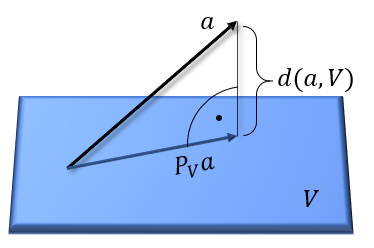  
</div>

Због тога је
$$d(A,V)^2=\sum_{i=1}^nd(a_i,V)^2=\sum_{i=1}^n\|a_i\|^2-\sum_{i=1}^n\|P_Va_i\|^2.$$
Уколико желимо да минимизирамо овај израз неопходно је постићи максимум суме $\displaystyle\sum_{i=1}^n\|P_Va_i\|^2.$

Означимо са $\widehat{V}$ потпростор димензије $k$ за који важи
$$\displaystyle\sum_{i=1}^n\|P_{\widehat{V}}a_i\|^2=\max_{{\rm dim}(V)= k}\displaystyle\sum_{i=1}^n\|P_Va_i\|^2.$$
За познавање потпростора $\widehat{V}$ довољно је познавање једне његове базе. Показаћемо како SVD обезбеђује ову базу.

Нека су координате тачака $a_1,a_2,\dots,a_n$ смештене у колоне матрице $A\in\mathcal{M}_{m\times n},$
$$A=\left[\begin{array}{c|c|c|c}
\phantom{W}&\phantom{W}&\phantom{W}&\phantom{W}\\
a_1&a_2&\dots&a_n\\
\phantom{W}&\phantom{W}&\phantom{W}&\phantom{W}
\end{array}\right].$$
Користимо редуковану SVD матрице $A,$ ${\rm rang}(A)=r=\min\{m,n\},$
$$A=U_r\Sigma_{r\times r}V_r^T,\qquad 
U_r=\left[\begin{array}{c|c|c|c}
\phantom{W}&\phantom{W}&\phantom{W}&\phantom{W}\\
u_1&u_2&\dots&u_r\\
\phantom{W}&\phantom{W}&\phantom{W}&\phantom{W}
\end{array}\right],\qquad 
V_r=\left[\begin{array}{c|c|c|c}
\phantom{W}&\phantom{W}&\phantom{W}&\phantom{W}\\
v_1&v_2&\dots&v_r\\
\phantom{W}&\phantom{W}&\phantom{W}&\phantom{W}
\end{array}\right],$$
где сингуларни вектори $u_1,u_2,\dots,u_r\in\mathbb{R}^m$ одговарају редом сингуларним вредностима $\sigma_1\geq\sigma_2\geq\dots\geq\sigma_r>0,$
$$Av_i=\sigma_i u_i\quad\Longleftrightarrow\quad u_i^TA=\sigma_iv_i^T,\quad i=1,2,\dots,r.$$

На основу последице 4. радне свеске 21SVD знамо да се најдуже пројекције вектора колона дешавају управо дуж вектора ортонормиране базе простора $\mathcal{R}(A),$ коју чине сингуларни вектори $u_1,u_2,\dots,u_r.$ Због тога је тражени потпростор димензије $k<r$ задат са првих $k$ вектора ове базе,
$$\widehat{V}=\mathcal{L}(u_1,u_2,\dots,u_k).$$

Означимо $A_k=U_k\Sigma_{k\times k}V_k^T$ редуковану SVD матрице $A_k.$ Њене колоне су пројекције колона $a_i$ на потпростор $\widehat{V}=\mathcal{R}(U_k).$ 
\begin{align}
U_kU_k^TA&=U_kU_k^TU_r\Sigma_{r\times r}V_r^T=U_kU_k^T
\begin{bmatrix}U_k&U_{r-k}\end{bmatrix}
\begin{bmatrix}\Sigma_{k\times k}&O_{k\times(r-k)}\\O_{(r-k)\times k}&\Sigma_{(r-k)\times(r-k)}\end{bmatrix}
\begin{bmatrix}V_k^T\\V_{r-k}^T\end{bmatrix}\\
&=U_k\begin{bmatrix}U_k^TU_k&U_k^TU_{r-k}\end{bmatrix}
\begin{bmatrix}\Sigma_{k\times k}&O_{k\times(r-k)}\\O_{(r-k)\times k}&\Sigma_{(r-k)\times(r-k)}\end{bmatrix}
\begin{bmatrix}V_k^T\\V_{r-k}^T\end{bmatrix}\\
&=U_k\begin{bmatrix}I_k&O_{k\times(r-k)}\end{bmatrix}
\begin{bmatrix}\Sigma_{k\times k}&O_{k\times(r-k)}\\O_{(r-k)\times k}&\Sigma_{(r-k)\times(r-k)}\end{bmatrix}
\begin{bmatrix}V_k^T\\V_{r-k}^T\end{bmatrix}\\
&=U_k\begin{bmatrix}\Sigma_{k\times k}&O_{k\times(r-k)}\end{bmatrix}
\begin{bmatrix}V_k^T\\V_{r-k}^T\end{bmatrix}=U_k\Sigma_{k\times k}V_k^T=A_k.
\end{align}

Координате вектора-колона матрице $A_k$ у односу на базу састављену од вектора $u_1,u_2,\dots,u_k$ садржане су у колонама матрице $Z=\Sigma_{k\times k}V_k^T=U_k^TA_k=U_k^TA\in\mathcal{M}_{k\times n}.$ На тај начин, уколико је потребно, уместо да баратамо пуном матрицом $A\in\mathcal{M}_{m\times n}$ можемо да радимо само координатама пројекција њених колона, што је матрица значајно мање димензије.

Приметимо да у било ком тренутку на основу матрице $Z$ можемо да реконструишемо оригиналну матрицу $A,$ додуше уз одређени губитак вредности. У радној свесци 21SVD у оквиру задатка 2 показано је да је $U_k^+=U_k^T\quad\Longrightarrow\quad (U_k^T)^+=U_k.$ Због тога је 
$$A\approx A_k=U_kZ.$$

Уколико се све колоне матрице $A$ замене својим пројекцијама на потпростор $\widehat{V},$ тј. ако се матрица $A$ замени матрицом $A_k,$ грешка апроксимације износи 
$$\|A\|_F^2-\|A_k\|_F^2=\sigma_{k+1}^2+\dots+\sigma_r^2.$$

Један од кључних елемената приликом анализе главних компоненти јесте центрирање податка. Да би подаци лежали у векторском потпростору што мање димензије неопходно је да буду центрирани. Разлог лежи у томе да сваки векторски простор мора да садржи нула-вектор $\theta.$ Центрирањем података вршимо њихову транслацију где се подаци групишу око координатног почетка.

**Пример 4.** Креираћемо линеарно корелисане податке њиховим $x$ и $y$ координатама. Скуп података биће дводимезионалне тачке $A=\{a_1,a_2,\dots,a_n\}\subset\mathbb{R}^2.$ Колоне матрице $A\in\mathcal{M}_{2\times n}$ садржаће координате тачака блиске правој.
За оригиналне и центриране податке одредићемо праве које су решења одговарајућих проблема најмањих квадрата. Центрирање вршимо дуж сваке врсте матрице $A,$ тј. центрирамо  $x$ координате тачака и центрирамо њихове $y$ координате.

In [18]:
n=20
x = 2*rndm.rand(n)-1
y = 2+3*x+rndm.randn(n)
p1=np.polyfit(x,y, 1,rcond=None, full=True)
A=np.stack((x,y),axis=0)
A

array([[ 0.47445581, -0.96955945, -0.93048497,  0.47599418, -0.5783336 ,
         0.60299137, -0.52553221, -0.40235314, -0.19128922,  0.23649624,
        -0.93196742, -0.08057619, -0.19557127,  0.52234006,  0.5730533 ,
        -0.92882664, -0.61421787,  0.16861467, -0.6128374 , -0.81841666],
       [ 4.04398746,  0.1735323 , -0.89037506,  3.01868487,  1.83034843,
         6.5479798 ,  1.64992337,  0.42349914,  1.38626898,  0.65194733,
         0.45159513,  2.8704095 ,  1.27923565,  2.99690141,  3.2499461 ,
        -0.3268398 , -0.32332221,  3.61785076,  0.44201424, -1.2806611 ]])

In [19]:
mu=A.mean(axis=1)
Ac=(A.T-mu).T
p2=np.polyfit(Ac[0],Ac[1], 1,rcond=None, full=True)

In [20]:
p1 , p2

((array([2.85417346, 2.26509042]),
  array([21.43077549]),
  2,
  array([1.17929643, 0.78055105]),
  4.440892098500626e-15),
 (array([ 2.85417346e+00, -2.67943544e-16]),
  array([21.43077549]),
  2,
  array([1., 1.]),
  4.440892098500626e-15))

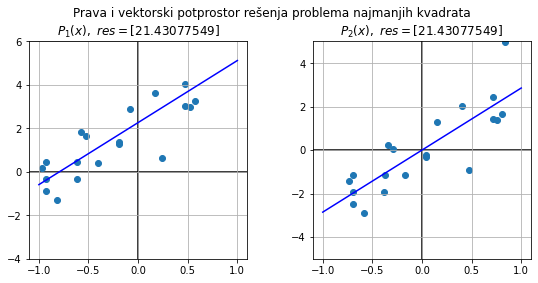

In [21]:
t=np.linspace(-1,1)
slika, ax = plt.subplots(1, 2,figsize=(9,4)) 
slika.suptitle('Prava i vektorski potprostor rešenja problema najmanjih kvadrata',y=1)
slika.subplots_adjust(wspace = 0.3, hspace=0.5)

pom=np.polyval(p1[0],t)
plt.subplot(1, 2, 1)
plt.title(r"$P_1(x),\ res=$"+str(p1[1]))
plt.plot(t,pom,'-b')
plt.scatter(x,y)
plt.ylim([-4, 6])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

pom=np.polyval(p2[0],t)
plt.subplot(1, 2, 2)
plt.title(r"$P_2(x),\ res=$"+str(p2[1]))
plt.plot(t,pom,'-b')
plt.scatter(Ac[0],Ac[1])
plt.ylim([-5, 5])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

Примећујемо да за центриране податке права линеарне регресије пролази кроз координатни почетак, слика десно. Та права представља векторски потпростор најближи у смислу најмањих квадрата. У случају нецентрираних података, слика лево, права линеарне регресије представља афини потпростор, не и векторски потпростор. Када бисмо тражили најближи векторски потпростор оваквим нецентрираним подацима ниједна права кроз координатни почетак не би била довољно добра апроксимација.

**Пример 5.** Приказаћемо транслацију података њиховим центрирањем и у $3D.$

In [22]:
n3=25
x3 = rndm.uniform(-1,3,n3)
xc=x3-x3.mean()
y3 = rndm.uniform(2,4,n3)
yc=y3-y3.mean()
z3=2*y3-x3+0.3*rndm.randn(n3)
zc=z3-z3.mean()

In [23]:
X,Y=np.meshgrid([-1,3],[2,4])
Z=2*Y-X

In [24]:
XC,YC=np.meshgrid([-2,2],[-2,2])
ZC=2*YC-XC

In [25]:
%matplotlib notebook

<IPython.core.display.Javascript object>


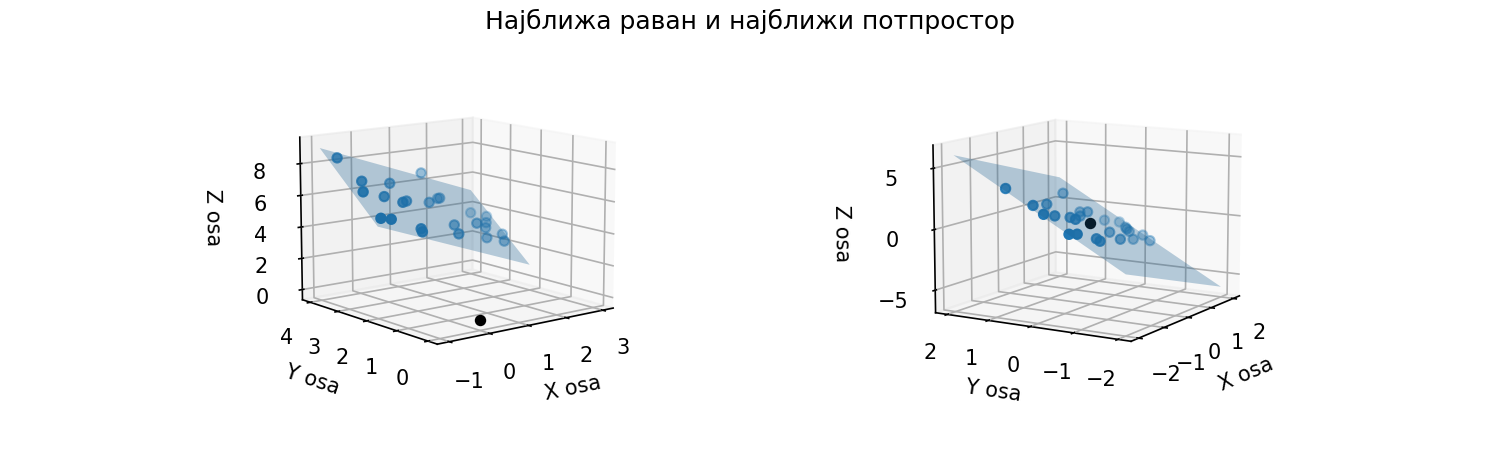

In [26]:
slika= plt.figure(figsize=(10,3)) 
slika.suptitle('Најближа раван и најближи потпростор')
slika.subplots_adjust(hspace=0.5)

ax1 = slika.add_subplot(121, projection='3d')
ax1.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax1.scatter(x3,y3,z3)
ax1.scatter([0],[0],[0],marker='o', color='k')
ax1.plot_surface(X,Y,Z,alpha=0.3);

ax2 = slika.add_subplot(122, projection='3d')
ax2.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax2.scatter(xc,yc,zc)
ax2.plot_surface(XC,YC,ZC,alpha=0.3)
ax2.scatter([0],[0],[0],marker='o', color='k');

In [27]:
%matplotlib inline

Преведимо сада геометријску формулацију претходне анализе на проблеме података. Претпоставимо да је матрица $A\in\mathcal{M}_{m\times n}$ са подацима размештеним тако да је $m$ карактеристика или обележја (feature) мерено $n$ пута (samples).

|подаци   |$1.$ мерење|$2.$ мерење|$\dots$|$n.$ мерење|
|---|---|---|---|---|
|$1.$ обележје|   |   |   |   |
|$2.$ обележје|   |   |   |   |
|$\vdots$ |   |   |   |   |
|$m.$ обележје|   |   |   |   |

Једна врста матрице $A$ носи резултате мерења једне карактеристике.  У примерима 4 и 5 прва врста матрице садржала је $x$ координате различитих тачака, друга врста носила је $y$ координате тачака, итд. Дакле, координате су везане за различита обележја податка. Дуж једне координатне осе прате се вредности једног обележја. Због тога центрирање вредности дуж једне координате има и статистичког смисла. Претпоставка је да се узорковане вредности једног обележја понашају на сличан начин.

Тачка $m-$димензионалног простора носи податке једног мерења $m$ карактеристика. Због тога колоне матрице $A$ зовемо узорцима, а врсте матрице $A$ зовемо вектори-обележја.
$$A=\left[\begin{array}{c|c|c|c}
у&у&\phantom{W}&у\\
з&з&\phantom{W}&з\\
о&о&\phantom{W}&о\\
р&р&\dots&р\\
а&а&\phantom{W}&а\\
к&к&\phantom{W}&к\\
1&2&\phantom{W}&m
\end{array}\right]=\left[\begin{array}{c}
\mbox{вектор обележја 1}^T\\\hline
\mbox{вектор обележја 2}^T\\\hline
\vdots\\\hline
\mbox{вектор обележја }m^T
\end{array}\right].$$
Претходни проблем проналажења најближег потпростора односи се на векторе узорака, тј. колоне матрице $A,$
$$A=\left[\begin{array}{c|c|c|c}
\phantom{W}&\phantom{W}&\phantom{W}&\phantom{W}\\
a_1&a_2&\dots&a_n\\
\phantom{W}&\phantom{W}&\phantom{W}&\phantom{W}
\end{array}\right]=\left[\begin{array}{c}
\phantom{WW}o_1^T\phantom{WW}\\\hline
\phantom{WW}o_2^T\phantom{WW}\\\hline
\vdots\\\hline
\phantom{WW}o_m^T\phantom{WW}
\end{array}\right].$$

Центрирамо векторе обележја, тј. векторе-врста матрице $A$ одузимањем средње вредности од сваке врсте. То је садржај матрице $A_C.$ 
\begin{align}
\mu_i&=\dfrac{o_i^T\mathbb{1}}{\mathbb{1}^T\mathbb{1}},\qquad \mathbb{1}=\begin{bmatrix}1&1&\dots&1\end{bmatrix}^T\in\mathbb{R}^n,\\
A_C&=\left[\begin{array}{c}
\phantom{WW}o_1^T-\mu_1\mathbb{1}^T\phantom{WW}\\\hline
\phantom{WW}o_2^T-\mu_2\mathbb{1}^T\phantom{WW}\\\hline
\vdots\\\hline
\phantom{WW}o_m^T-\mu_m\mathbb{1}^T\phantom{WW}
\end{array}\right]=A\left(I-\dfrac{\mathbb{1}\mathbb{1}^T}{\mathbb{1}^T\mathbb{1}}\right)\\
&=\left[\begin{array}{c}
\phantom{WW}c_1^T\phantom{WW}\\\hline
\phantom{WW}c_2^T\phantom{WW}\\\hline
\vdots\\\hline
\phantom{WW}c_m^T\phantom{WW}
\end{array}\right].
\end{align}
Због центрирања, сума колона матрице $A_C$ је нула-вектор (сума елемената дуж сваке врсте је $0$). 
$$A_C\mathbb{1}=A\left(I-\dfrac{\mathbb{1}\mathbb{1}^T}{\mathbb{1}^T\mathbb{1}}\right)\mathbb{1}
=A\left(\mathbb{1}-\dfrac{\mathbb{1}\mathbb{1}^T\mathbb{1}}{\mathbb{1}^T\mathbb{1}}\right)
=A\left(\mathbb{1}-\dfrac{\mathbb{1}^T\mathbb{1}}{\mathbb{1}^T\mathbb{1}}\mathbb{1}\right)
=A(\mathbb{1}-\mathbb{1})=\theta.$$

На овај начин долазимо до објашњења поступка PCA кроз статистичке термине. Матрица $A_C$ носи информације о одступању компоненти вектора-обележја од њихове средње вредности. Због тога је тотална варијанса скупа података дата изразом
$$T=\dfrac{\|A_C\|_F^2}{n}=\dfrac{\|c_1\|^2+\|c_2\|^2+\dots+\|c_m\|^2}{n}.$$
Ово је траг Грамове матрице $S=\dfrac{A_CA_C^T}{n}.$ Симетрична матрица $S$ садржи истовремено информације о варијанси и коваријанси вектора обележја. Дијагонални елементи матрице $S$ су варијансе вектора-врста матрице $A,$ а ван дијагонални елементи садрже њихове коваријансе. Матрица $S$ садржи податке о нивоу линеарне корелисаности између посматраних карактеристика.

Уколико сопствене вредности матрице коваријансе $S$ поређамо у опадајући низ, одговарајући ортонормирани сопствени вектори (главне компоненте) указују на неке нове карактеристике података које носе највише варијабилности, а међусобно су некорелисане. На тај начин траг матрице $S$ повезује тоталну варијансу са сумом варијанси главних компоненти. Одговарајуће податке читамо директно из SVD матрице $A_C,$ с обзиром да важи
$$A_C=U_r\Sigma_{r\times r} V_r^T\quad\Longrightarrow\quad A_CA_C^T=U_r\Sigma_{r\times r}^2U_r^T,$$
$$U_r=\left[\begin{array}{c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
u_1&u_2&\dots&u_r\\
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right],\qquad \Sigma_{r\times r}={\rm diag}(\sigma_1,\sigma_2,\dots,\sigma_r).$$
Одатле је тотална варијанса
$$T=\dfrac{\|A_C\|_F^2}{n}={\rm tr}(S)=\dfrac{\sigma_1^2+\sigma_2^2+\dots+\sigma_r^2}{n}.$$

Прва главна компонента $u_1$ заслужна је за $\dfrac{\sigma_1^2}{nT}$ тоталне варијансе. Наредни сингуларни вектор $u_2$ доприноси са $\dfrac{\sigma_2^2}{nT}$ удела у тоталној варијанси. Сваки наредни сингуларни вектор служи да на најбољи начин опише преосталу варијабилност у подацима, а сви заједно описују тоталну варијансу.

Поента Eckart-Young-Mirsky теореме јесте да првих $k$ сингуларних вектора описују садржај матрице податка више него било којих других $k$ јединичних вектора. Сингуларни вектори $u_1,u_2,\dots,u_k$ су резултат линеарних кобинација полазних обележја, због тога представљају мањи скуп изведених обележја која ефикасније описују полазни скуп података. 

**Пример 6.** Израчунаћемо матрицу коваријансе за податке из примера 4.

In [28]:
S=Ac@Ac.T/n
S

array([[0.30988739, 0.88447236],
       [0.88447236, 3.59597631]])

Правац простирања једнодимензионалног потпростора најближег подацима одређује сопствени вектор који одговара доминантној сопственој вредности.

In [29]:
sop_vr, Q=np.linalg.eigh(S)
sop_vr

array([0.08695048, 3.81891321])

In [30]:
Q[:,1]

array([0.24441189, 0.9696715 ])

In [31]:
Q[1,1]/Q[0,1]

3.967366294254601

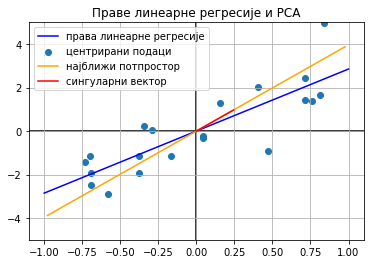

In [32]:
plt.title("Праве линеарне регресије и PCA")
plt.plot(t,pom,'-b',label="права линеарне регресије")
plt.scatter(Ac[0],Ac[1],label="центрирани подаци")
koef=np.array([-4,4])
plt.plot(koef*Q[0,1],koef*Q[1,1],'-',color="orange",label="најближи потпростор")
plt.plot([0,Q[0,1]],[0,Q[1,1]],'-r',label="сингуларни вектор")
plt.ylim([-5, 5])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid()
plt.legend();

Приметимо да се правац простирања најближе праве у смислу PCA и проблема најмањих квадрата разликује. Разлог лежи у начину мерења растојања тачака од праве. У проблему најмањих квадрата мере се растојања само по $y$ компоненти, док у анализи главним осама се мере ортогонална растојања тачака од праве. Због тога се анализа главних компоненти још назива и ортогонална регресија или ортогонални најмањи квадрати.
<div>
   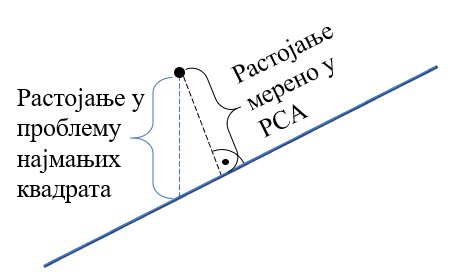  
</div>

**Пример 7.** Искористићемо познату базу MNIST слика ручно писаних цифара. Слике су црно-беле формата $28\times28$ пиксела па представљају векторе димензије $28\cdot28=784.$ Различита обележја су вредности пиксела на одговарајућој позицији. 

In [33]:
m=28*28
m

784

In [34]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [35]:
baza = tfds.load('mnist', split='train', as_supervised=True)
n=len(baza)
n

60000

Учитана база састоји се од $60000$ сличица са пратећим подацима. Приказаћемо првих $10$ података учитане базе.

In [36]:
ds10 = baza.take(10)
len(ds10)

10

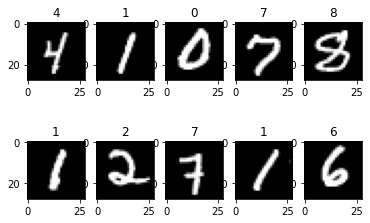

In [37]:
podaci=tfds.as_numpy(ds10)
k=1
for slika, labela in podaci:
    plt.subplot(2, 5, k)
    plt.imshow(slika, cmap="gray")
    plt.title(labela)
    k+=1

Креирајмо сада матрицу слика $A$ и центрирајмо врсте.

In [38]:
A=np.empty((m,n))
j=0
for slika, _ in tfds.as_numpy(baza):
    A[:,j]=slika.reshape(m,)
    j+=1
mu=A.mean(axis=1)
Ac=(A.T-mu).T    

Резултат центрирања погледаћемо на примеру првих $10$ слика.

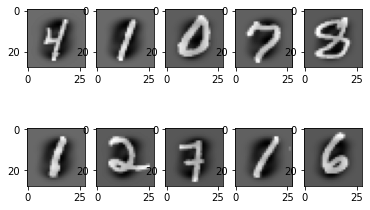

In [39]:
for k in range(10):
    plt.subplot(2, 5, k+1)
    plt.imshow(Ac[:,k].reshape(28,28), cmap="gray")

In [40]:
U, Sigma, VT=spl.svd(Ac,full_matrices=False)
U.shape

(784, 784)

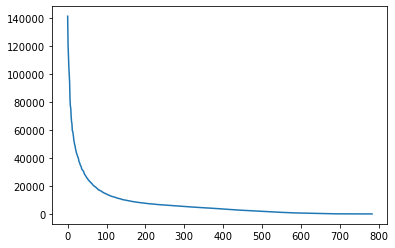

In [41]:
plt.plot(Sigma)

Одредићемо тоталну варијансу података као норму вектора сингуларних вредности као и кумулативни проценат удела сингуларних вектора у тоталној варијанси.

In [42]:
S=Sigma**2
T=np.sum(S)
procenat=np.cumsum(S)/T

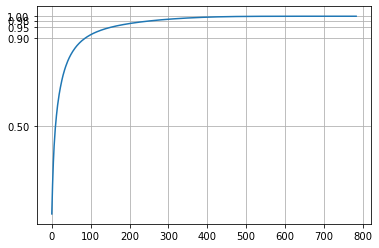

In [43]:
plt.plot(procenat)
plt.yticks([0.5,0.9,0.95,0.98,1])
plt.grid();

Закључујемо да приближно првих $150$ сингуларних вектора описује $95\%$ тоталне варијансе, а првих $250$ описује $98\%$ тоталне варијансе. Због тога, довољно је да радимо са матрицом података $150\times 60000$ или $250\times 60000$ уместо полазне.

Смањење димензионалности проверићемо визуелно на првих $10$ података базе.

In [44]:
k=150
Uk, Sigmak, Vkt=U[:,:k], Sigma[:k], VT[:k]
A10=(Uk*Sigmak)@Vkt[:,:10]
A10t=(A10.T+mu).T

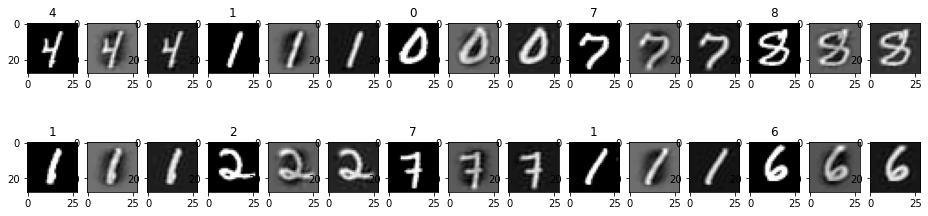

In [45]:
k=0
slika=plt.figure(figsize=(16,4))
for slika, labela in podaci:
    plt.subplot(2, 15, 3*k+1)
    plt.imshow(slika, cmap="gray")
    plt.title(labela)
    plt.subplot(2, 15, 3*k+2)
    plt.imshow(A10[:,k].reshape(28,28), cmap="gray")
    plt.subplot(2, 15, 3*k+3)
    plt.imshow(A10t[:,k].reshape(28,28), cmap="gray")
    k+=1

In [46]:
k=250
Uk, Sigmak, Vkt=U[:,:k], Sigma[:k], VT[:k]
A10=(Uk*Sigmak)@Vkt[:,:10]
A10t=(A10.T+mu).T

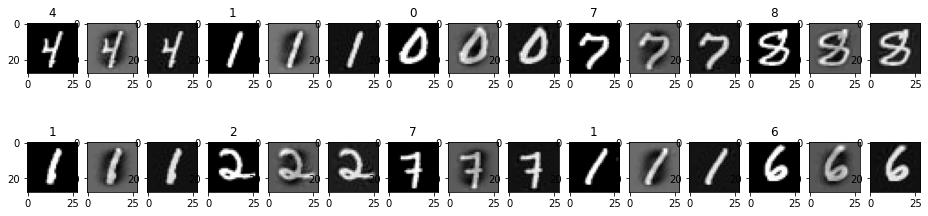

In [47]:
k=0
slika=plt.figure(figsize=(16,4))
for slika, labela in podaci:
    plt.subplot(2, 15, 3*k+1)
    plt.imshow(slika, cmap="gray")
    plt.title(labela)
    plt.subplot(2, 15, 3*k+2)
    plt.imshow(A10[:,k].reshape(28,28), cmap="gray")
    plt.subplot(2, 15, 3*k+3)
    plt.imshow(A10t[:,k].reshape(28,28), cmap="gray")
    k+=1